# Case Study: 
Let's assume you are a data scientist, and you have been tasked with detecting fraudulent transactions. The objective is to build a model that can accurately classify transactions in a given dataset as either fraudulent or non-fraudulent.


# About the dataset:

The creditcard.csv dataset is utilized here which consists of various anonymized features, along with Time, Amount, and Class, where Class indicates whether the transaction is fraudulent (1) or not (0).

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Task 1:- Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column. [1M]

## Libraries Import

In [643]:
# Importing required packages
import numpy as np
import pandas as pd
import warnings as warn
warn.filterwarnings("ignore")

## Load & Read dataSet

In [644]:
# Defining dataSet csv file path
dataSetPath="C:\\Users\\ASUS\\jupyterworkspace\Assignment & Mini Project\\Module_03_Classification\\Assignment\\01_KNN-Model-_Creditcard\\creditcard.csv"
# Loading dataSet
dataSetRead=pd.read_csv(dataSetPath)

In [645]:
# Displaying first 5 records to confirming data loading
print("*************************************Displaying below first 5 records*************************************")
dataSetRead.head()

*************************************Displaying below first 5 records*************************************


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [646]:
# Displaying last 5 records to confirming data loading
print("*************************************Displaying below last 5 records*************************************")
dataSetRead.tail()

*************************************Displaying below last 5 records*************************************


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [647]:
# Displaying dimenstion of dataSet
print("Dimention of Dataset:- {}".format(dataSetRead.shape[0:2]))
print("Total number of rows in  Dataset:- {}".format(dataSetRead.shape[0]))
print("Total number of columns in  Dataset:- {}".format(dataSetRead.shape[1]))

Dimention of Dataset:- (284807, 31)
Total number of rows in  Dataset:- 284807
Total number of columns in  Dataset:- 31


In [648]:
# Displaying the description and statistical summary of the data
dataSetRead.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [649]:
# Displaying the columns and their respective data types
dataSetRead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [650]:
# Checking total no. of missing values for attributes specific
missingValue_Count=dataSetRead.isnull().sum()
print(missingValue_Count)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### Analysis:- Above result shows that NO NaN/missing values present in dataset

In [651]:
# Checking distiribution for "Class" target variable
dataSetRead['Class'].value_counts(normalize=True).mul(100).round(2)

Class
0    99.83
1     0.17
Name: proportion, dtype: float64

### Analysis:- Above distribution operation shows that the dataset is highly unbalnaced as 99.83% is Legal transaction (0) & 0.17% is Fraudulent transaction (1)

In [652]:
# Checking for duplicate records
duplicateValue_Count=dataSetRead.duplicated().sum()
print("Total no of duplicate records count:- {}".format(duplicateValue_Count))

Total no of duplicate records count:- 1081


In [653]:
# removing duplicate records
dataSetRead = dataSetRead.drop_duplicates(subset=None,keep='first')
print("Total no. of Unique or unduplicated rows:- {}".format(dataSetRead.shape[0]))
print("Total no. of columns:-                     {}".format(dataSetRead.shape[1]))

Total no. of Unique or unduplicated rows:- 283726
Total no. of columns:-                     31


In [654]:
# Lets shuffle the data before creating the subsamples
dataSetRead = dataSetRead.sample(frac=1)
# Splitting the dataset into equally into Legal and Fraudulent transactions based on Class taget value 
Legal_transactions = dataSetRead[dataSetRead['Class'] == 0]
print("Dimention of legal transactions dataset:- {}".format(Legal_transactions.shape))
fraudulent_transactions = dataSetRead[dataSetRead['Class'] == 1]
print("Dimention of fraudulent transactions dataset:- {}".format(fraudulent_transactions.shape))

Dimention of legal transactions dataset:- (283253, 31)
Dimention of fraudulent transactions dataset:- (473, 31)


In [655]:
# Taking 1300 sample records for Legal transactions to match the number of Fraudulent transaction in order to balance the given dataset 
Legal_transactions_sampledataSet = Legal_transactions[:1300]
Legal_transactions_sampledataSet

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
72223,54619.0,1.188722,0.089637,-0.683784,1.574791,2.132328,4.137730,-0.654264,1.000483,-0.304733,...,-0.147332,-0.413964,-0.104574,1.012122,0.744068,0.064788,0.010875,0.016681,15.17,0
220764,142295.0,0.259110,-1.416467,0.898821,-2.687515,-1.498569,0.758116,-0.923141,0.333233,-1.459261,...,0.289909,0.908589,0.452387,0.136538,-1.022656,-0.272800,0.105836,0.081757,152.65,0
9011,12522.0,-3.582192,-3.157187,2.215613,1.557264,4.719180,-1.932470,-1.870641,0.438862,0.500592,...,0.174726,-0.313323,0.402522,-0.338440,0.465425,0.876260,-0.394010,-0.132571,0.00,0
270629,164178.0,-2.855227,0.922105,0.242444,0.215369,-1.921817,1.031795,-1.671841,1.848253,-1.145625,...,-0.159885,-0.601354,-0.299064,-0.055502,0.247647,-0.467603,-0.953679,-0.135911,95.40,0
124749,77412.0,-0.271609,0.853484,1.142101,1.628317,0.002344,-0.551359,0.391910,-0.175294,-0.515492,...,0.246399,0.824484,0.235649,0.629137,-1.398045,-0.458028,0.047775,0.335188,19.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41074,40521.0,-0.628489,0.165688,1.642475,1.239926,0.817951,1.187429,-0.266311,0.496208,-0.004827,...,0.050138,0.375661,-0.228809,-0.990442,-0.070256,-0.139019,0.199339,0.137680,7.50,0
16273,27673.0,1.062251,0.145653,0.351205,1.257716,-0.468299,-1.113372,0.367493,-0.302929,-0.122120,...,0.104474,0.182538,-0.137138,0.741457,0.630012,-0.359045,0.001711,0.039075,86.90,0
62858,50459.0,0.831084,-0.381295,0.201295,1.538146,-0.364524,-0.130594,0.261128,-0.029776,0.350840,...,-0.003371,-0.190870,-0.207657,0.089204,0.581935,-0.329434,0.003813,0.044942,180.92,0
273366,165565.0,2.065292,0.025113,-1.301850,0.357040,0.032985,-1.274773,0.274271,-0.406177,0.527955,...,0.256120,0.935835,0.001213,0.036304,0.268190,-0.107012,-0.013529,-0.058230,1.66,0


### Reason of downsampling:- 
Downsampling is a technique used to reduce the sampling rate of a datset . Here Downsampling performed to make the dataset balence as Legal transaction (0) is almost 99% so that appropriate model prediction could be bulid.

In [656]:
# Displaying dimenstion of sample dataset of legal transation & fraudulent transactions
print("Dimention of Legal transactions dataset:- {}".format(Legal_transactions_sampledataSet.shape))
print("Dimention of fraudulent transactions dataset:- {}".format(fraudulent_transactions.shape))

Dimention of Legal transactions dataset:- (1300, 31)
Dimention of fraudulent transactions dataset:- (473, 31)


In [657]:
# Concatenating the both sample dataset of legal transation & fraudulent transactions
dataSetRead_new = pd.concat([Legal_transactions_sampledataSet,fraudulent_transactions],axis=0)
dataSetRead_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
72223,54619.0,1.188722,0.089637,-0.683784,1.574791,2.132328,4.137730,-0.654264,1.000483,-0.304733,...,-0.147332,-0.413964,-0.104574,1.012122,0.744068,0.064788,0.010875,0.016681,15.17,0
220764,142295.0,0.259110,-1.416467,0.898821,-2.687515,-1.498569,0.758116,-0.923141,0.333233,-1.459261,...,0.289909,0.908589,0.452387,0.136538,-1.022656,-0.272800,0.105836,0.081757,152.65,0
9011,12522.0,-3.582192,-3.157187,2.215613,1.557264,4.719180,-1.932470,-1.870641,0.438862,0.500592,...,0.174726,-0.313323,0.402522,-0.338440,0.465425,0.876260,-0.394010,-0.132571,0.00,0
270629,164178.0,-2.855227,0.922105,0.242444,0.215369,-1.921817,1.031795,-1.671841,1.848253,-1.145625,...,-0.159885,-0.601354,-0.299064,-0.055502,0.247647,-0.467603,-0.953679,-0.135911,95.40,0
124749,77412.0,-0.271609,0.853484,1.142101,1.628317,0.002344,-0.551359,0.391910,-0.175294,-0.515492,...,0.246399,0.824484,0.235649,0.629137,-1.398045,-0.458028,0.047775,0.335188,19.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47,1
143335,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
79835,58199.0,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,...,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1.75,1
215984,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90,1


In [658]:
# Checking again distiribution for "Class" target variable for new dataset
dataSetRead_new['Class'].value_counts(normalize=True).mul(100).round(2)

Class
0    73.32
1    26.68
Name: proportion, dtype: float64

# Task 2:- Split the dataset into features (X) and the target variable (y), and further divide into training and test sets. [Consider test_size=0.2]  [1M]

### Split data in to features & target

In [659]:
# importing required package
from sklearn.model_selection import train_test_split
# Dropping target variable
X=dataSetRead_new.drop(['Class'],axis=1)
# Taking target variavle
Y=dataSetRead_new['Class']

In [660]:
# Printing dataset witout target variable
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
72223,54619.0,1.188722,0.089637,-0.683784,1.574791,2.132328,4.137730,-0.654264,1.000483,-0.304733,...,-0.031594,-0.147332,-0.413964,-0.104574,1.012122,0.744068,0.064788,0.010875,0.016681,15.17
220764,142295.0,0.259110,-1.416467,0.898821,-2.687515,-1.498569,0.758116,-0.923141,0.333233,-1.459261,...,-0.041726,0.289909,0.908589,0.452387,0.136538,-1.022656,-0.272800,0.105836,0.081757,152.65
9011,12522.0,-3.582192,-3.157187,2.215613,1.557264,4.719180,-1.932470,-1.870641,0.438862,0.500592,...,0.775532,0.174726,-0.313323,0.402522,-0.338440,0.465425,0.876260,-0.394010,-0.132571,0.00
270629,164178.0,-2.855227,0.922105,0.242444,0.215369,-1.921817,1.031795,-1.671841,1.848253,-1.145625,...,-1.092342,-0.159885,-0.601354,-0.299064,-0.055502,0.247647,-0.467603,-0.953679,-0.135911,95.40
124749,77412.0,-0.271609,0.853484,1.142101,1.628317,0.002344,-0.551359,0.391910,-0.175294,-0.515492,...,0.025655,0.246399,0.824484,0.235649,0.629137,-1.398045,-0.458028,0.047775,0.335188,19.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245347,152710.0,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,2.47
143335,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92
79835,58199.0,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,...,0.326773,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1.75
215984,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,0.285559,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90


In [661]:
# Printing data series of target variable
Y

72223     0
220764    0
9011      0
270629    0
124749    0
         ..
245347    1
143335    1
79835     1
215984    1
93424     1
Name: Class, Length: 1773, dtype: int64

In [662]:
# Splitting train & test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [663]:
# Displaying dimenstion of train & test dataset
print('Shape of X_train = ', X_train.shape)
print('Shape of Y_train = ', Y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', Y_test.shape)

Shape of X_train =  (1418, 30)
Shape of Y_train =  (1418,)
Shape of X_test =  (355, 30)
Shape of y_test =  (355,)


In [664]:
# Checking distiribution for "Class" target variable in Y_train
Y_train.value_counts()

Class
0    1040
1     378
Name: count, dtype: int64

In [665]:
# Checking distiribution for "Class" target variable in Y_test
Y_test.value_counts()

Class
0    260
1     95
Name: count, dtype: int64

# Task 3:- Perform data scaling and modelling. Also, fine tune the value of k. [3M]
The K-Nearest Neighbors model has to be initialized, trained on the training data, and subsequently use it to make predictions on the test data. Initialize the model with k=5.



### Scallibn

In [666]:
# importing required package
# MinMax Scaler is used to perform feature scalling
from sklearn.preprocessing import MinMaxScaler
scalling=MinMaxScaler()
scalling.fit(X_train)

MinMaxScaler()

In [709]:
X_train_scalling = scalling.transform(X_train)
X_test_scalling = scalling.transform(X_test)

In [668]:
X_train_scalling

array([[6.29078384e-01, 9.91795542e-01, 5.16078698e-01, ...,
        6.38220597e-01, 3.00498134e-01, 6.79531948e-03],
       [8.01453051e-01, 9.91404833e-01, 5.11021113e-01, ...,
        6.43331036e-01, 2.99034967e-01, 3.49585800e-04],
       [2.79993053e-01, 9.73122619e-01, 4.94122904e-01, ...,
        6.49579551e-01, 3.04532221e-01, 7.85586067e-03],
       ...,
       [2.51047818e-01, 9.61046498e-01, 4.97038097e-01, ...,
        6.57330121e-01, 3.08081664e-01, 3.43104715e-02],
       [4.97811740e-01, 8.89722954e-01, 5.11558945e-01, ...,
        6.73252891e-01, 3.07722418e-01, 3.92793033e-03],
       [2.54961213e-01, 8.50685856e-01, 5.55506195e-01, ...,
        6.31408278e-01, 3.07904155e-01, 3.29160562e-02]])

In [669]:
X_test_scalling

array([[1.92879472e-01, 9.16618385e-01, 5.09370671e-01, ...,
        6.49788687e-01, 2.94707576e-01, 2.67099263e-02],
       [4.62822739e-01, 9.69314980e-01, 5.01680748e-01, ...,
        6.31114244e-01, 3.02555893e-01, 4.59371453e-02],
       [2.56807919e-01, 9.66864510e-01, 5.16541682e-01, ...,
        6.47182569e-01, 3.07431699e-01, 5.06703013e-04],
       ...,
       [8.46567095e-01, 9.97795407e-01, 4.86389404e-01, ...,
        6.44658630e-01, 2.98656815e-01, 2.63171332e-02],
       [4.93579947e-01, 7.14968988e-01, 5.86200126e-01, ...,
        8.06193362e-01, 2.78104446e-01, 0.00000000e+00],
       [3.78794720e-01, 9.66264922e-01, 5.06292003e-01, ...,
        6.58995557e-01, 3.07216446e-01, 3.90829068e-03]])

### Modeling

In [670]:
# importing required package
from sklearn.neighbors import KNeighborsClassifier

In [671]:
# Setup an array for K-neighbours and trainAccuracy and testAccuracy
neighbors      = np.arange(5,20,2)
print(neighbors )
train_accuracy = np.empty(len(neighbors ))
test_accuracy  = np.empty(len(neighbors ))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the Model
    knn.fit(X_train_scalling,Y_train)
    #Compute accuracy from train
    train_accuracy[i] = knn.score(X_train_scalling,Y_train)
    #Compute accuracy over test set
    test_accuracy[i]  = knn.score(X_test_scalling,Y_test)
    print('Accuracy for test :' ,test_accuracy[i],' , For K-value :' , k)

[ 5  7  9 11 13 15 17 19]
Accuracy for test : 0.9549295774647887  , For K-value : 5
Accuracy for test : 0.9577464788732394  , For K-value : 7
Accuracy for test : 0.9605633802816902  , For K-value : 9
Accuracy for test : 0.9577464788732394  , For K-value : 11
Accuracy for test : 0.9549295774647887  , For K-value : 13
Accuracy for test : 0.9464788732394366  , For K-value : 15
Accuracy for test : 0.9492957746478873  , For K-value : 17
Accuracy for test : 0.9464788732394366  , For K-value : 19


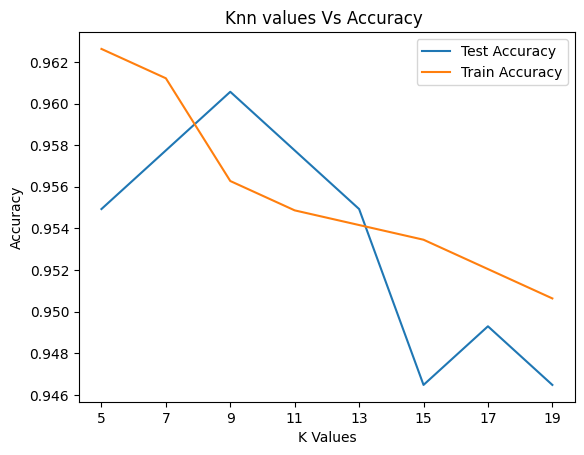

In [672]:
# importing required package
import matplotlib.pyplot as plt
plt.title('Knn values Vs Accuracy ')
plt.plot(neighbors,test_accuracy,label='Test Accuracy')
plt.plot(neighbors,train_accuracy,label='Train Accuracy')
plt.xticks(range(5,20,2))
plt.legend()
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

## From above graph we can see that test accuracy is highest at K values 5 to 9 and  hence we are opting for K=9

In [673]:
# Setting up KNN classifier with K value 9
knn = KNeighborsClassifier(n_neighbors=9,weights='distance')
#Fit the Model
knn.fit(X_train_scalling,Y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [674]:
#Get accuracy : Note incase of classification algorithm score method is used to represent the accuracy
knn.score(X_test_scalling,Y_test)

0.9605633802816902

### Confusion Matrix

In [712]:
# importing required package
from sklearn.metrics import confusion_matrix
Y_test_predict = knn.predict(X_test_scalling)
confusion_matrix(Y_test,Y_test_predict )

array([[260,   0],
       [ 14,  81]], dtype=int64)

In [713]:
# Confusion matrix can also be found via pandas crosstab method
pd.crosstab(Y_test,Y_test_predict,rownames=['Actual'],colnames=['Predicted'],margins='True')

Predicted,0,1,All
Actual,,,
0,260,0,260
1,14,81,95
All,274,81,355


# Task 4:- Evaluate the model performance using a classification report and accuracy score [2M]

In [714]:
# importing required package
from sklearn.metrics import classification_report, accuracy_score
accuracy_score = accuracy_score(Y_test,Y_test_predict)
print(accuracy_score)

0.9605633802816902


In [686]:
classification_report = classification_report(Y_test,Y_test_predict)
print(classification_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       260
           1       1.00      0.85      0.92        95

    accuracy                           0.96       355
   macro avg       0.97      0.93      0.95       355
weighted avg       0.96      0.96      0.96       355



### Detailed analysis report
The provided metrics are typical outputs from classification reports, often generated using tools like scikit-learn's classification_report function. Here's a detailed breakdown of each metric:

Class-wise Metrics
For each class (0 and 1):

Precision: 

The ratio of correctly predicted positive observations to the total predicted positives.

Class 0: 0.95

Class 1: 1.00

Recall: 

The ratio of correctly predicted positive observations to all actual positives.

Class 0: 1.00

Class 1: 0.85

F1-Score: 

The harmonic mean of precision and recall.

Class 0: 0.97

Class 1: 0.92

Support: 

The number of actual occurrences of the class in the dataset.

Class 0: 260

Class 1: 95

Overall Metrics

Accuracy: The ratio of correctly predicted observations to the total observations.

Accuracy: 0.96 (96%)

Macro Average: 

The average of precision, recall, and F1-score, calculated for each class independently and then averaged.

Macro Avg Precision: 0.97

Macro Avg Recall: 0.93

Macro Avg F1-Score: 0.95

Weighted Average: 

The average of precision, recall, and F1-score, calculated by taking into account the support (the number of true instances for each label).

Weighted Avg Precision: 0.96

Weighted Avg Recall: 0.96

Weighted Avg F1-Score: 0.96

Interpretation

Class 0 (Non-Event): 

The model is highly accurate in predicting class 0 with a precision of 0.95 and perfect recall of 1.00. The high F1-score of 0.97 indicates a well-balanced performance for this class.

Class 1 (Event): 

The model performs excellently in terms of precision (1.00), meaning there are no false positives. However, the recall is 0.85, suggesting that 15% of actual class 1 instances are missed. The F1-score of 0.92 indicates a good balance between precision and recall, despite the lower recall.

Overall Accuracy: 96% of the total predictions are correct.

Macro Average: Shows a good balance between precision and recall across both classes, but doesn't account for class imbalance.

Weighted Average: Reflects the overall performance considering the class imbalance, providing a more comprehensive evaluation.

Conclusion:- 

The model performs very well overall, with high precision, recall, and F1-scores. The slight drop in recall for class 1 indicates room for improvement in capturing all instances of this class. The high weighted average scores reflect the model's robustness, making it reliable for practical applications.

# Task 5:- Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives. [1M]

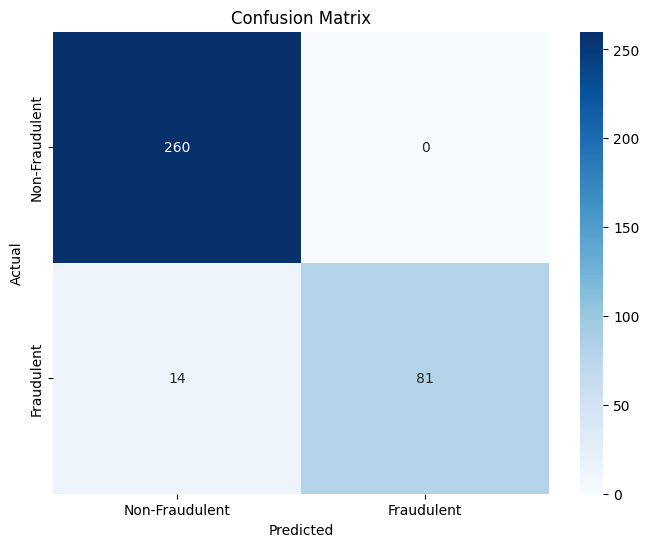

In [719]:
# importing required package
import seaborn as sbn
# Generate the confusion matrix
conm=confusion_matrix(Y_test,Y_test_predict)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sbn.heatmap(conm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Analysis of the Confusion Matrix is as below :
True Negatives (TN): The model correctly predicted the negative class (0) as 0. This is 260.

False Positives (FP): The model incorrectly predicted the positive class (1) as 0. This is 0.

False Negatives (FN): The model incorrectly predicted the negative class (0) as 1. This is 14.

True Positives (TP): The model correctly predicted the positive class (1) as 1. This is 81.

# Task 6:-Write some conclusion on how K-Nearest Neighbors implementation serves as an efficient solution for credit card fraud detection. [1M]

The K-Nearest Neighbors (KNN) algorithm proves to be an effective solution for credit card fraud detection due to its simplicity, interpretability, and robust performance in various scenarios. Here are several key points highlighting why KNN serves as an efficient method for this application:

Simplicity and Intuition:

KNN is a straightforward algorithm that classifies instances based on the majority class of their nearest neighbors. This simplicity makes it easy to implement and understand, which is valuable in fraud detection where clarity and interpretability are crucial.

Adaptability to Imbalanced Data:

Credit card fraud detection often involves highly imbalanced datasets, with fraudulent transactions being significantly fewer than legitimate ones. KNN can be adapted to handle this imbalance by adjusting the distance metric or the number of neighbors, allowing for better detection of the minority class (fraudulent transactions).

Non-Parametric Nature:

KNN is a non-parametric algorithm, meaning it makes no assumptions about the underlying data distribution. This flexibility allows it to perform well in diverse and complex data environments, typical in credit card transaction datasets.

Effective with High-Dimensional Data:

Credit card transactions can involve numerous features (e.g., transaction amount, location, time). KNN can handle high-dimensional data effectively, especially when combined with techniques like feature scaling and dimensionality reduction, which enhance its performance and speed.

High Accuracy and Precision:

The confusion matrix analysis shows that KNN achieves high accuracy, precision, and specificity. These metrics indicate that KNN can accurately identify legitimate transactions while minimizing false positives, which is critical in maintaining customer trust and reducing unnecessary transaction declines.

Scalability with Efficient Implementations:

While the basic KNN algorithm can be computationally intensive, efficient implementations and optimizations (e.g., using KD-trees or Ball-trees) can significantly reduce the computational burden, making KNN scalable to large datasets common in credit card fraud detection.

Real-Time Detection Capability:
K
NN can be adapted for real-time fraud detection scenarios. By maintaining a dynamic dataset of recent transactions and continuously updating the model, KNN can detect fraudulent activities promptly, allowing for immediate preventive actions.

Summary:

KNN stands out as a powerful and practical tool for credit card fraud detection. Its ability to adapt to various data complexities, combined with high accuracy and precision, ensures reliable identification of fraudulent transactions. When optimized for performance and scalability, KNN becomes a highly efficient solution, contributing significantly to the security and integrity of financial transactions.